In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
file_path = "/Users/timothygao/Downloads/Fire_Dataset_Processed.csv"
target_column = "fire"

In [3]:
data = pd.read_csv(file_path)
data

,Unnamed: 0,latitude,longitude,t2m,t2mdew,t2mwet,ts,t2m_range,t2m_max,t2m_min,...,landcovertype5,landcovertype6,landcovertype7,landcovertype8,landcovertype9,landcovertype10,landcovertype11,landcovertype12,landcovertype13,fire
0,0,-1.551761,1.063832,0.610215,1.151001,-0.885244,0.843973,2.524876,-0.940081,0.109246,...,0,0,0,0,0,0,0,1,0,1
1,1,-0.622059,1.316635,-1.142182,-0.618628,-0.570326,-1.833103,-0.884678,-0.255544,-0.834956,...,0,0,0,0,0,1,0,0,0,0
2,2,-1.381161,0.353897,-0.369378,-0.411465,-0.917357,-0.631050,0.837528,-0.146093,-0.379134,...,0,0,0,1,0,0,0,0,0,0
3,3,-0.784725,1.015423,-0.092871,0.598568,-0.908034,0.398406,1.728926,-0.454041,0.065059,...,0,0,0,1,0,0,0,0,0,1
4,4,0.922823,-0.168984,0.051291,0.588440,-0.917357,0.462058,1.874172,-0.529174,0.011570,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,16744,-1.380265,0.805762,-0.099961,-0.535763,-0.898711,-1.103547,0.705562,-0.440128,-0.641929,...,0,0,0,0,0,0,0,0,1,0
16745,16745,-0.904647,1.562939,0.060745,1.060771,-0.889388,0.919867,2.189564,-0.768483,0.160410,...,0,0,0,0,0,0,0,0,0,0
16746,16746,1.003828,-0.442628,1.261308,-1.622215,0.465588,-1.211267,0.411749,0.645113,-2.421028,...,0,0,1,0,0,0,0,0,0,1
16747,16747,-1.460186,0.412988,0.117464,1.134428,-0.179786,0.528159,-0.858949,1.370463,0.938330,...,0,0,0,0,0,0,1,0,0,1


In [4]:
print(len(data))
print(len(data.columns))

for i in data.columns:
    print(i)

16749
143
Unnamed: 0
latitude
longitude
t2m
t2mdew
t2mwet
ts
t2m_range
t2m_max
t2m_min
diff
dnr
allsky_sfc_uva
allsky_sfc_uvb
allsky_sfc_lw_dwn
prectot
ps
qv2m
rh2m
srf_alb
t10m
t10m_max
t10m_min
t10m_range
tqv
ws10m
ws10m_max
ws10m_min
ws10m_range
ws2m
ws2m_max
ws2m_min
ws2m_range
u10m
v10m
ts_max
ts_min
ts_range
direct_illuminance
diffuse_illuminance
pw
allsky_sfc_uv_index
gwetprof
snodp
gwetroot
rhoa
z0m
gwettop
to3
troppb
tropq
tropt
toa_sw_dni
toa_sw_dwn
clrsky_sfc_par_tot
evptrns
pbltop
allsky_sfc_sw_dwn
allsky_sfc_lw_up
allsky_sfc_sw_up
optical_depth_047
optical_depth_055
column_wv
dayl
prcp
srad
swe
vp
distroad1
distroad2
spi14d
spi30d
spi270d
eddi14d
eddi30d
eddi270d
spei14d
spei30d
spei270d
pdsi
z
spi1y
eddi1y
spei1y
elevation
et
le
pet
ple
gpp
psnnet
lc_prop2
lc_prop3
fpar
lai
lst_day_1km
hgt
dpt
wdir
spfh
pres
ndvi
rmax
rmin
sph
th
tmmn
tmmx
vs
fm100
fm1000
eto
etr
vpd
pr
erc
bi
population
population_density
minority_race
majority_race
greater_than_65
less_than_65
housing_u

In [5]:
features = ['PRECTOT', 'PS', 'T10M', 'WS10M', 'DIFFUSE_ILLUMINANCE', 'DIRECT_ILLUMINANCE', 'GWETPROF', 'T2MDEW', 'distroad1', 'z', 'ndvi', 'population_density',
            
            'pres', 'prectot', 'ppt'
            
            ]

for i in range(len(features)):
    features[i] = features[i].lower()

X = data[features]
y = data[target_column]

In [6]:
def select_features(X, y, k=15):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()].tolist()
    return X_selected, selected_features

def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

def train_evaluate_models(X, y):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'Naive Bayes': GaussianNB(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Neural Network': MLPClassifier(max_iter=1000),
    }
    
    results = {}
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        results[name] = {
            'mean_cv_score': np.mean(cv_scores),
            'std_cv_score': np.std(cv_scores)
        }
        
        model.fit(X, y)
        results[name]['model'] = model
    
    return results

def plot_results(results):
    names = list(results.keys())
    means = [result['mean_cv_score'] for result in results.values()]
    stds = [result['std_cv_score'] for result in results.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(names, means, yerr=stds, capsize=5)
    plt.title('Model Performance Comparison')
    plt.ylabel('Mean CV Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded data with 15 features and 16749 samples
Selected 15 features: prectot, ps, t10m, ws10m, diffuse_illuminance, direct_illuminance, gwetprof, t2mdew, distroad1, z, ndvi, population_density, pres, prectot, ppt


/opt/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:25:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:25:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:25:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:25:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/lib/python3.12/site-


Logistic Regression:
Mean CV Accuracy: 0.7821 (+/- 0.0053)

Decision Tree:
Mean CV Accuracy: 0.8863 (+/- 0.0062)

Random Forest:
Mean CV Accuracy: 0.9260 (+/- 0.0060)

SVM:
Mean CV Accuracy: 0.8484 (+/- 0.0037)

Naive Bayes:
Mean CV Accuracy: 0.7329 (+/- 0.0106)

XGBoost:
Mean CV Accuracy: 0.9296 (+/- 0.0052)

Gradient Boosting:
Mean CV Accuracy: 0.8899 (+/- 0.0070)

AdaBoost:
Mean CV Accuracy: 0.8506 (+/- 0.0051)

K-Nearest Neighbors:
Mean CV Accuracy: 0.8363 (+/- 0.0064)

Neural Network:
Mean CV Accuracy: 0.8821 (+/- 0.0047)


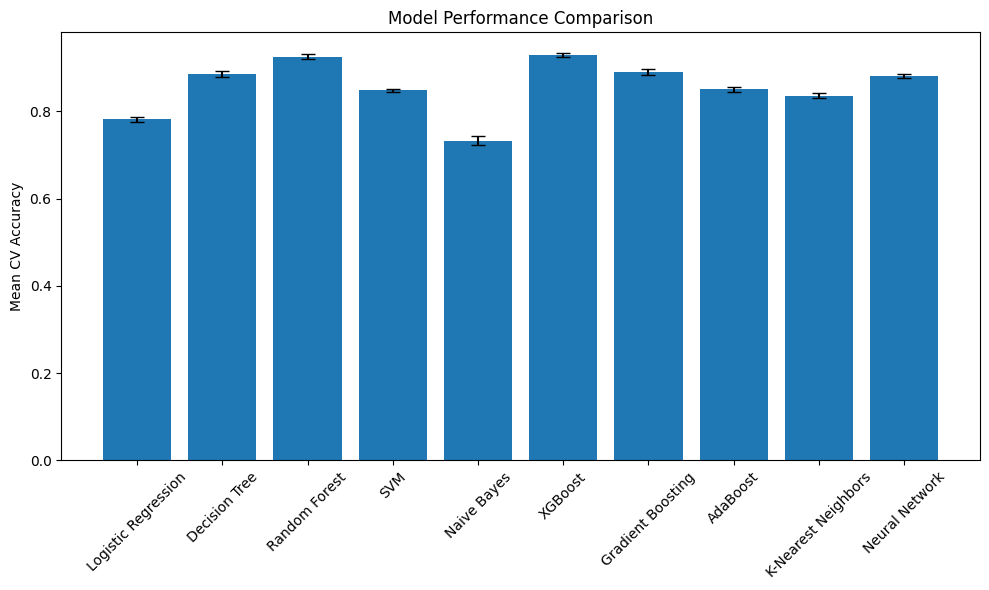


Best Model (XGBoost) Performance on Test Set:
Accuracy: 0.9322

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1436
           1       0.93      0.96      0.94      1914

    accuracy                           0.93      3350
   macro avg       0.93      0.93      0.93      3350
weighted avg       0.93      0.93      0.93      3350



In [7]:
print(f"Loaded data with {X.shape[1]} features and {len(y)} samples")

# Feature selection
X_selected, selected_features = select_features(X, y)
print(f"Selected {len(selected_features)} features: {', '.join(selected_features)}")

# Scale features
X_scaled, _ = scale_features(X_selected)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate models
results = train_evaluate_models(X_train, y_train)

# Print results
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Mean CV Accuracy: {result['mean_cv_score']:.4f} (+/- {result['std_cv_score']:.4f})")

# Plot results
plot_results(results)

# Evaluate best model on test set
best_model_name = max(results, key=lambda x: results[x]['mean_cv_score'])
best_model = results[best_model_name]['model']
y_pred = best_model.predict(X_test)

print(f"\nBest Model ({best_model_name}) Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [8]:
X_selected, selected_features = select_features(X, y)
print(f"Selected {len(selected_features)} features: {', '.join(selected_features)}")

X_scaled, _ = scale_features(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Selected 15 features: prectot, ps, t10m, ws10m, diffuse_illuminance, direct_illuminance, gwetprof, t2mdew, distroad1, z, ndvi, population_density, pres, prectot, ppt


In [9]:
from sklearn.inspection import permutation_importance


# Plot feature importance
def plot_feature_importance(model, X, y, feature_names):
    plt.figure(figsize=(10, 6))
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.title("Feature Importances")
        plt.bar(range(X.shape[1]), importances[indices])
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        # For models without built-in feature importance, use permutation importance
        perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
        sorted_idx = perm_importance.importances_mean.argsort()
        
        plt.title("Permutation Importances")
        plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx])
        plt.yticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx])
        plt.tight_layout()
        plt.show()

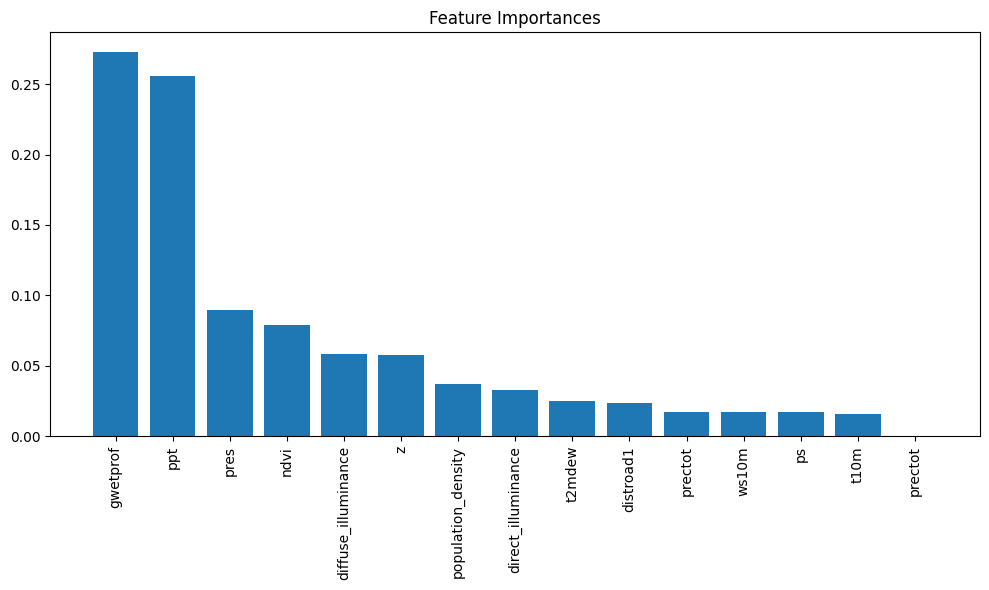

In [10]:
plot_feature_importance(best_model, X_train, y_train, features)

In [11]:
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [16]:
best_model.fit(X_test, y_test)

/opt/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:28:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
print(best_model.get_booster().get_dump()[0])  # Print the first tree as text


0:[f6<0.345856071] yes=1,no=2,missing=2
	1:[f12<1.17454588] yes=3,no=4,missing=4
		3:[f6<-0.391216218] yes=7,no=8,missing=8
			7:[f12<-0.43428418] yes=13,no=14,missing=14
				13:[f7<0.268028319] yes=23,no=24,missing=24
					23:[f10<-0.873935163] yes=37,no=38,missing=38
						37:leaf=0.311524034
						38:leaf=-0.155247509
					24:[f1<0.818107367] yes=39,no=40,missing=40
						39:leaf=0.407292515
						40:leaf=-0.0574598424
				14:[f10<-0.122732364] yes=25,no=26,missing=26
					25:[f11<0.0629290715] yes=41,no=42,missing=42
						41:leaf=-0.592183232
						42:leaf=-0.111052059
					26:[f12<0.246336743] yes=43,no=44,missing=44
						43:leaf=-0.252677292
						44:leaf=0.263866216
			8:[f9<0.829868972] yes=15,no=16,missing=16
				15:[f4<-0.858185232] yes=27,no=28,missing=28
					27:[f6<-0.0226800796] yes=45,no=46,missing=46
						45:leaf=0.10576611
						46:leaf=-0.366487026
					28:[f14<0.0295939595] yes=47,no=48,missing=48
						47:leaf=0.405446351
						48:leaf=-0.353698909
				16:[f3<0.1

In [18]:
import pickle
with open('./pred_year.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)